In [1]:
import pandas as pd

In [254]:
df = pd.read_csv("전처리 전부 완료 기아 데이터.csv", encoding="utf-8")

In [255]:
df.drop("고객 세그먼트", axis=1, inplace=True)

In [256]:
df

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역
0,Emily Johnson,1987-05-25,38,남,+1-983-243-5951,jeremyberger@newton-watson.com,인천광역시 부평구 부평대로 88,user762756,2023-09-21,픽업트럭,K3,False,2023-10-13,55987533,현금,6,온라인,2020-05,미국
1,Jessica Smith,1979-11-24,46,여,001-718-884-2716,robert55@hotmail.com,경기도 고양시 일산동구 중앙로 1036,user787282,2025-01-12,준대형 SUV,Pegas,False,2025-01-30,26135305,계좌이체,1,온라인,2020-12,미국
2,Robert White,1984-08-25,41,남,(532)836-9308,garciaelizabeth@burns.net,인천광역시 부평구 부평대로 88,user293846,2024-12-17,준대형 세단,Optima / K5,False,2025-01-05,20425328,현금,3,온라인,2021-01,미국
3,John Smith,1971-08-07,54,여,640.695.8051,phillipstroy@yahoo.com,전라북도 군산시 백릉로 300,user935434,2024-01-17,중형 세단,Accent (HC),False,2024-02-14,28976142,신용카드,6,오프라인,2020-06,미국
4,Emily Thomas,1991-12-26,34,여,+1-023-521-7921x18289,anthonygraves@smith.com,세종특별자치시 나성북로 21,user384834,2024-12-07,준중형 SUV,EV6,True,2024-12-29,53143909,계좌이체,1,온라인,2019-03,미국
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,김하준,1972-07-18,53,남,010-7863-2944,user5781@example.com,서울특별시 강남구 테헤란로 123,user452994,2021-09-12,준중형 해치백,Carnival,False,2021-10-09,25020000,현금,2,오프라인,2020-08,대한민국
1896,최지민,1965-07-21,60,여,010-5926-8982,user1371@example.com,대구광역시 수성구 범어동 789,user333338,2015-09-20,준중형 해치백,K4,False,2015-10-12,44660000,신용카드,3,오프라인,2014-04,대한민국
1897,장지민,1986-04-28,39,여,010-3164-6681,user7652@example.com,서울특별시 강남구 테헤란로 123,user292930,2020-06-10,대형 세단,Optima / K5,False,2020-07-04,24570000,신용카드,1,오프라인,2019-12,대한민국
1898,임예린,1977-12-20,48,여,010-1747-7304,user9677@example.com,경기도 성남시 분당구 정자동 202,user973159,2015-09-22,준중형 SUV,KX3,False,2015-10-09,16210000,현금,2,오프라인,2015-03,대한민국


In [25]:
# 거래 금액에 천단위 콤마 제거하고 숫자형으로 변환
df['거래 금액'] = df['거래 금액'].str.replace(',', '').astype(int)

In [258]:
car_features = ['거래 방식', '제품 출시년월', '제품 구매 날짜']
num_features = ['거래 금액', '제품 구매 빈도']

In [259]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
# 전처리 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), car_features)
    ]
)

In [261]:
# 클러스터링 파이프라인 생성
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

In [262]:
# 클러스터링에 사용할 데이터 준비
X = df[num_features + car_features]

In [263]:
pipeline.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['거래 금액', '제품 구매 빈도']),
                                                 ('cat', OneHotEncoder(),
                                                  ['거래 방식', '제품 출시년월',
                                                   '제품 구매 날짜'])])),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [264]:
# 클러스터 레이블 할당
df['고객 세그먼트'] = pipeline.named_steps['kmeans'].labels_

In [265]:
df.to_csv("전처리 완료 기아 데이터_세그먼트.csv", index=False, encoding="utf-8")

In [36]:
# 클러스터링 성능 평가 (실루엣 점수)
silhouette_avg = silhouette_score(pipeline.named_steps['preprocessor'].transform(X), df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.13700727601123208


In [37]:
df.to_csv("../data/기아_고객1600명_더미데이터_클러스터링.csv", index=False, encoding="utf-8")

In [266]:
# 클러스터 특성 분석
cluster_summary = df.groupby('고객 세그먼트')[num_features].mean()
print(cluster_summary)

                거래 금액  제품 구매 빈도
고객 세그먼트                        
0        4.209010e+07  4.033019
1        5.758211e+07  1.484034
2        3.098584e+07  1.465421
3        3.345621e+07  1.508671


In [267]:
# {0 : 일반, 1 : VIP, 2 : 신규, 3 : 이탈가능}

In [40]:
df_new = pd.read_csv("../main_project\project_1\data_mini1\클러스터링고객데이터_5.csv")

In [42]:
df_new["차량구분"].unique()

array(['준중형 세단', '준대형 세단', '중형 suv', ' 중형 suv', '중형 세단', '준중형 해치백',
       ' 중형 세단', '대형 세단', '준중형 suv', '준대형 suv', '대형 suv', '픽업트럭',
       '소형 해치백'], dtype=object)

In [52]:
df_1 = pd.read_csv("../data/기아_고객1600명_더미데이터_클러스터링.csv", encoding="utf-8")

In [53]:
df_1

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,Cluster
0,Emily Johnson,1987-05-25,38,남,+1-983-243-5951,jeremyberger@newton-watson.com,"46935 Martinez Ridges, Arnoldborough, NM 62572",whogan,2022-06-22,NaN,K3,N,2023-10-13,55987533,현금,6,온라인,2020-05,미국,1
1,Jessica Smith,1979-11-24,46,여,001-718-884-2716,robert55@hotmail.com,"403 Tucker Rapid, Evansstad, KY 40637",butlerapril,2024-10-08,NaN,Pegas,N,2025-01-30,26135305,계좌이체,1,온라인,2020-12,미국,3
2,Robert White,1984-08-25,41,남,(532)836-9308,garciaelizabeth@burns.net,"00565 Mercado Expressway, New Roy, MT 96663",joneslori,2022-07-17,NaN,Optima / K5,N,2025-01-05,20425328,현금,3,온라인,2021-01,미국,2
3,John Smith,1971-08-07,54,여,640.695.8051,phillipstroy@yahoo.com,"18849 Decker Circles, Walkerburgh, MD 46982",omathews,2023-03-23,NaN,Accent (HC),N,2024-02-14,28976142,신용카드,6,오프라인,2020-06,미국,2
4,Emily Thomas,1991-12-26,34,여,+1-023-521-7921x18289,anthonygraves@smith.com,"814 Murillo Road Suite 056, East Tiffany, AZ 7...",stephen76,2024-06-08,NaN,EV6,Y,2024-12-29,53143909,계좌이체,1,온라인,2019-03,미국,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Camila Hernandez,1985-02-03,40,남,652-029-6179x273,corraleseugenio@hotmail.com,"Circunvalación Guerrero 122 918, San Hermelind...",ariadnaornelas,2023-05-28,NaN,K4,N,2023-06-25,63187473,현금,1,온라인,2023-12,멕시코,0
1596,Valeria Vargas,1997-06-06,28,남,1-448-627-0126x80613,pnavarrete@arevalo-rosas.com,"Cerrada Sinaloa 532 832, San María Eugenia de ...",rolando91,2023-12-28,NaN,Tucson(NX4),N,2024-12-24,44807001,계좌이체,1,오프라인,2019-05,멕시코,0
1597,Valeria Vargas,1974-06-26,51,여,1-989-857-5629x2721,godoyandrea@corporacin.com,"Privada Coahuila de Zaragoza 211 Interior 348,...",smarquez,2025-01-29,NaN,KX7,N,2025-03-20,62708986,계좌이체,1,온라인,2018-03,멕시코,0
1598,Juan Morales,1969-05-16,56,남,(000)338-9320,tamayomartin@yahoo.com,"Boulevard Hungría 829 019, Vieja Lituania, SIN...",benito62,2024-06-08,NaN,K4,N,2024-11-02,33378433,현금,1,오프라인,2023-04,멕시코,3


In [54]:
# 차량 종류 목록
vehicle_types = ['준중형 세단', '준대형 세단', '중형 SUV', '중형 세단', '준중형 해치백',
                 '대형 세단', '준중형 SUV', '준대형 SUV', '대형 SUV', '픽업트럭', '소형 해치백']

In [55]:

# 차량 컬럼에 랜덤으로 차량 종류 넣기
df_1['차량구분'] = np.random.choice(vehicle_types, size=len(df_1))

In [47]:
df_1

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,Cluster
0,Emily Johnson,1987-05-25,38,남,+1-983-243-5951,jeremyberger@newton-watson.com,"46935 Martinez Ridges, Arnoldborough, NM 62572",whogan,2022-06-22,픽업트럭,K3,N,2023-10-13,55987533,현금,6,온라인,2020-05,미국,1
1,Jessica Smith,1979-11-24,46,여,001-718-884-2716,robert55@hotmail.com,"403 Tucker Rapid, Evansstad, KY 40637",butlerapril,2024-10-08,준대형 SUV,Pegas,N,2025-01-30,26135305,계좌이체,1,온라인,2020-12,미국,3
2,Robert White,1984-08-25,41,남,(532)836-9308,garciaelizabeth@burns.net,"00565 Mercado Expressway, New Roy, MT 96663",joneslori,2022-07-17,준대형 세단,Optima / K5,N,2025-01-05,20425328,현금,3,온라인,2021-01,미국,2
3,John Smith,1971-08-07,54,여,640.695.8051,phillipstroy@yahoo.com,"18849 Decker Circles, Walkerburgh, MD 46982",omathews,2023-03-23,중형 세단,Accent (HC),N,2024-02-14,28976142,신용카드,6,오프라인,2020-06,미국,2
4,Emily Thomas,1991-12-26,34,여,+1-023-521-7921x18289,anthonygraves@smith.com,"814 Murillo Road Suite 056, East Tiffany, AZ 7...",stephen76,2024-06-08,준중형 SUV,EV6,Y,2024-12-29,53143909,계좌이체,1,온라인,2019-03,미국,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Camila Hernandez,1985-02-03,40,남,652-029-6179x273,corraleseugenio@hotmail.com,"Circunvalación Guerrero 122 918, San Hermelind...",ariadnaornelas,2023-05-28,중형 SUV,K4,N,2023-06-25,63187473,현금,1,온라인,2023-12,멕시코,0
1596,Valeria Vargas,1997-06-06,28,남,1-448-627-0126x80613,pnavarrete@arevalo-rosas.com,"Cerrada Sinaloa 532 832, San María Eugenia de ...",rolando91,2023-12-28,준중형 해치백,Tucson(NX4),N,2024-12-24,44807001,계좌이체,1,오프라인,2019-05,멕시코,0
1597,Valeria Vargas,1974-06-26,51,여,1-989-857-5629x2721,godoyandrea@corporacin.com,"Privada Coahuila de Zaragoza 211 Interior 348,...",smarquez,2025-01-29,픽업트럭,KX7,N,2025-03-20,62708986,계좌이체,1,온라인,2018-03,멕시코,0
1598,Juan Morales,1969-05-16,56,남,(000)338-9320,tamayomartin@yahoo.com,"Boulevard Hungría 829 019, Vieja Lituania, SIN...",benito62,2024-06-08,준중형 세단,K4,N,2024-11-02,33378433,현금,1,오프라인,2023-04,멕시코,3


In [56]:
df_1 =pd.read_csv("../data/기아_고객1600명_더미데이터_클러스터링_차량구분.csv",encoding="utf-8")

In [57]:
df_1["구매한 제품"].unique()

array(['K3', 'Pegas', 'Optima / K5', 'Accent (HC)', 'EV6', 'KX7',
       "C'eed CUV", 'K4', 'K5', 'Telluride', 'KX5', 'Seltos', 'Sorento',
       'Carnival', 'K2', 'KX3', 'Rio(pride)', 'Forte', 'Carnival (CKD)',
       'Carens MPV', 'Sonet', 'Sportage', "C'eed", 'Syros', 'Cerato',
       'KX1', 'EV5', 'Zhipao', 'EV9', 'Tucson(NX4)'], dtype=object)

In [58]:
# 모델별 친환경차 여부 정보
environmental_info = {
    'K3': False,
    'Pegas': False,
    'Optima / K5': False,
    'Accent (HC)': False,
    'EV6': True,
    'KX7': False,
    "C'eed CUV": False,
    'K4': False,
    'K5': False,
    'Telluride': False,
    'KX5': False,
    'Seltos': False,
    'Sorento': False,
    'Carnival': False,
    'K2': False,
    'KX3': False,
    'Rio(pride)': False,
    'Forte': False,
    'Carnival (CKD)': False,
    'Carens MPV': False,
    'Sonet': False,
    'Sportage': False,
    "C'eed": False,
    'Syros': False,
    'Cerato': False,
    'KX1': False,
    'EV5': True,
    'Zhipao': False,
    'EV9': True,
    'Tucson(NX4)': False
}

In [59]:
# 친환경차 여부 컬럼 추가
df_1['친환경차'] = df_1['구매한 제품'].apply(lambda x: environmental_info.get(x, False))

In [60]:
df_1

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,Cluster
0,Emily Johnson,1987-05-25,38,남,+1-983-243-5951,jeremyberger@newton-watson.com,"46935 Martinez Ridges, Arnoldborough, NM 62572",whogan,2022-06-22,픽업트럭,K3,False,2023-10-13,55987533,현금,6,온라인,2020-05,미국,1
1,Jessica Smith,1979-11-24,46,여,001-718-884-2716,robert55@hotmail.com,"403 Tucker Rapid, Evansstad, KY 40637",butlerapril,2024-10-08,준대형 SUV,Pegas,False,2025-01-30,26135305,계좌이체,1,온라인,2020-12,미국,3
2,Robert White,1984-08-25,41,남,(532)836-9308,garciaelizabeth@burns.net,"00565 Mercado Expressway, New Roy, MT 96663",joneslori,2022-07-17,준대형 세단,Optima / K5,False,2025-01-05,20425328,현금,3,온라인,2021-01,미국,2
3,John Smith,1971-08-07,54,여,640.695.8051,phillipstroy@yahoo.com,"18849 Decker Circles, Walkerburgh, MD 46982",omathews,2023-03-23,중형 세단,Accent (HC),False,2024-02-14,28976142,신용카드,6,오프라인,2020-06,미국,2
4,Emily Thomas,1991-12-26,34,여,+1-023-521-7921x18289,anthonygraves@smith.com,"814 Murillo Road Suite 056, East Tiffany, AZ 7...",stephen76,2024-06-08,준중형 SUV,EV6,True,2024-12-29,53143909,계좌이체,1,온라인,2019-03,미국,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Camila Hernandez,1985-02-03,40,남,652-029-6179x273,corraleseugenio@hotmail.com,"Circunvalación Guerrero 122 918, San Hermelind...",ariadnaornelas,2023-05-28,중형 SUV,K4,False,2023-06-25,63187473,현금,1,온라인,2023-12,멕시코,0
1596,Valeria Vargas,1997-06-06,28,남,1-448-627-0126x80613,pnavarrete@arevalo-rosas.com,"Cerrada Sinaloa 532 832, San María Eugenia de ...",rolando91,2023-12-28,준중형 해치백,Tucson(NX4),False,2024-12-24,44807001,계좌이체,1,오프라인,2019-05,멕시코,0
1597,Valeria Vargas,1974-06-26,51,여,1-989-857-5629x2721,godoyandrea@corporacin.com,"Privada Coahuila de Zaragoza 211 Interior 348,...",smarquez,2025-01-29,픽업트럭,KX7,False,2025-03-20,62708986,계좌이체,1,온라인,2018-03,멕시코,0
1598,Juan Morales,1969-05-16,56,남,(000)338-9320,tamayomartin@yahoo.com,"Boulevard Hungría 829 019, Vieja Lituania, SIN...",benito62,2024-06-08,준중형 세단,K4,False,2024-11-02,33378433,현금,1,오프라인,2023-04,멕시코,3


In [63]:
df_1.to_csv("../data/기아_고객1600명_더미데이터_클러스터링_차량구분_친환경차.csv",encoding="utf-8")

In [64]:
df_1.rename(columns={'Cluster': '고객 세그먼트'}, inplace=True)

In [65]:
df_1

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,고객 세그먼트
0,Emily Johnson,1987-05-25,38,남,+1-983-243-5951,jeremyberger@newton-watson.com,"46935 Martinez Ridges, Arnoldborough, NM 62572",whogan,2022-06-22,픽업트럭,K3,False,2023-10-13,55987533,현금,6,온라인,2020-05,미국,1
1,Jessica Smith,1979-11-24,46,여,001-718-884-2716,robert55@hotmail.com,"403 Tucker Rapid, Evansstad, KY 40637",butlerapril,2024-10-08,준대형 SUV,Pegas,False,2025-01-30,26135305,계좌이체,1,온라인,2020-12,미국,3
2,Robert White,1984-08-25,41,남,(532)836-9308,garciaelizabeth@burns.net,"00565 Mercado Expressway, New Roy, MT 96663",joneslori,2022-07-17,준대형 세단,Optima / K5,False,2025-01-05,20425328,현금,3,온라인,2021-01,미국,2
3,John Smith,1971-08-07,54,여,640.695.8051,phillipstroy@yahoo.com,"18849 Decker Circles, Walkerburgh, MD 46982",omathews,2023-03-23,중형 세단,Accent (HC),False,2024-02-14,28976142,신용카드,6,오프라인,2020-06,미국,2
4,Emily Thomas,1991-12-26,34,여,+1-023-521-7921x18289,anthonygraves@smith.com,"814 Murillo Road Suite 056, East Tiffany, AZ 7...",stephen76,2024-06-08,준중형 SUV,EV6,True,2024-12-29,53143909,계좌이체,1,온라인,2019-03,미국,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Camila Hernandez,1985-02-03,40,남,652-029-6179x273,corraleseugenio@hotmail.com,"Circunvalación Guerrero 122 918, San Hermelind...",ariadnaornelas,2023-05-28,중형 SUV,K4,False,2023-06-25,63187473,현금,1,온라인,2023-12,멕시코,0
1596,Valeria Vargas,1997-06-06,28,남,1-448-627-0126x80613,pnavarrete@arevalo-rosas.com,"Cerrada Sinaloa 532 832, San María Eugenia de ...",rolando91,2023-12-28,준중형 해치백,Tucson(NX4),False,2024-12-24,44807001,계좌이체,1,오프라인,2019-05,멕시코,0
1597,Valeria Vargas,1974-06-26,51,여,1-989-857-5629x2721,godoyandrea@corporacin.com,"Privada Coahuila de Zaragoza 211 Interior 348,...",smarquez,2025-01-29,픽업트럭,KX7,False,2025-03-20,62708986,계좌이체,1,온라인,2018-03,멕시코,0
1598,Juan Morales,1969-05-16,56,남,(000)338-9320,tamayomartin@yahoo.com,"Boulevard Hungría 829 019, Vieja Lituania, SIN...",benito62,2024-06-08,준중형 세단,K4,False,2024-11-02,33378433,현금,1,오프라인,2023-04,멕시코,3


In [66]:
df_1.to_csv("../data/기아_고객1600명_더미데이터_클러스터링_차량구분_친환경차.csv",encoding="utf-8")

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [268]:
# CSV 파일 로드
data = pd.read_csv('전처리 완료 기아 데이터_세그먼트.csv', encoding='utf-8', index_col=0)

In [269]:
data

,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,고객 세그먼트
이름,,,,,,,,,,,,,,,,,,,
Emily Johnson,1987-05-25,38,남,+1-983-243-5951,jeremyberger@newton-watson.com,인천광역시 부평구 부평대로 88,user762756,2023-09-21,픽업트럭,K3,False,2023-10-13,55987533,현금,6,온라인,2020-05,미국,0
Jessica Smith,1979-11-24,46,여,001-718-884-2716,robert55@hotmail.com,경기도 고양시 일산동구 중앙로 1036,user787282,2025-01-12,준대형 SUV,Pegas,False,2025-01-30,26135305,계좌이체,1,온라인,2020-12,미국,3
Robert White,1984-08-25,41,남,(532)836-9308,garciaelizabeth@burns.net,인천광역시 부평구 부평대로 88,user293846,2024-12-17,준대형 세단,Optima / K5,False,2025-01-05,20425328,현금,3,온라인,2021-01,미국,2
John Smith,1971-08-07,54,여,640.695.8051,phillipstroy@yahoo.com,전라북도 군산시 백릉로 300,user935434,2024-01-17,중형 세단,Accent (HC),False,2024-02-14,28976142,신용카드,6,오프라인,2020-06,미국,0
Emily Thomas,1991-12-26,34,여,+1-023-521-7921x18289,anthonygraves@smith.com,세종특별자치시 나성북로 21,user384834,2024-12-07,준중형 SUV,EV6,True,2024-12-29,53143909,계좌이체,1,온라인,2019-03,미국,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
김하준,1972-07-18,53,남,010-7863-2944,user5781@example.com,서울특별시 강남구 테헤란로 123,user452994,2021-09-12,준중형 해치백,Carnival,False,2021-10-09,25020000,현금,2,오프라인,2020-08,대한민국,2
최지민,1965-07-21,60,여,010-5926-8982,user1371@example.com,대구광역시 수성구 범어동 789,user333338,2015-09-20,준중형 해치백,K4,False,2015-10-12,44660000,신용카드,3,오프라인,2014-04,대한민국,0
장지민,1986-04-28,39,여,010-3164-6681,user7652@example.com,서울특별시 강남구 테헤란로 123,user292930,2020-06-10,대형 세단,Optima / K5,False,2020-07-04,24570000,신용카드,1,오프라인,2019-12,대한민국,2


In [270]:
# 타겟 변수 설정
target = '고객 세그먼트'

In [271]:
car_features = ['거래 방식', '제품 출시년월', '제품 구매 날짜']
num_features = ['거래 금액', '제품 구매 빈도']

In [272]:
# 데이터 전처리 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), car_features)
    ]
)

In [273]:
# 모델 파이프라인 생성
pipelines = {
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(random_state=42))
    ])
}

In [274]:
# 데이터 분할
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [275]:
### RandomForestClassifier 학습 및 평가 ###
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("\n")

Random Forest Accuracy: 0.9842105263157894
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        83
           1       0.97      0.99      0.98       114
           2       0.98      1.00      0.99       111
           3       1.00      1.00      1.00        72

    accuracy                           0.98       380
   macro avg       0.99      0.98      0.98       380
weighted avg       0.98      0.98      0.98       380





In [276]:
### GradientBoostingClassifier 학습 및 평가 ###
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])
gb_pipeline.fit(X_train, y_train)
gb_pred = gb_pipeline.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))
print("\n")


Gradient Boosting Accuracy: 0.9973684210526316
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      0.99      1.00       114
           2       0.99      1.00      1.00       111
           3       1.00      1.00      1.00        72

    accuracy                           1.00       380
   macro avg       1.00      1.00      1.00       380
weighted avg       1.00      1.00      1.00       380





In [277]:
### SVC 학습 및 평가 ###
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
print("\n")

SVM Accuracy: 0.9921052631578947
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       1.00      0.99      1.00       114
           2       0.98      1.00      0.99       111
           3       1.00      1.00      1.00        72

    accuracy                           0.99       380
   macro avg       0.99      0.99      0.99       380
weighted avg       0.99      0.99      0.99       380





In [148]:
import joblib

In [278]:
joblib.dump(gb_pipeline, 'model/gb_model.pkl')

['model/gb_model.pkl']

In [150]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [151]:
df_2 = pd.read_csv("..\data\한국인_고객_데이터_300명_최종_빈도조정.csv", encoding="utf-8")

In [152]:
# 차량 종류 목록
vehicle_types = ['준중형 세단', '준대형 세단', '중형 SUV', '중형 세단', '준중형 해치백',
                 '대형 세단', '준중형 SUV', '준대형 SUV', '대형 SUV', '픽업트럭', '소형 해치백']

# 차량 컬럼에 랜덤으로 차량 종류 넣기
df_2['차량구분'] = np.random.choice(vehicle_types, size=len(df_2))

In [153]:
df_2

,이름,성별,생년월일,연령,구매한 제품,제품 출시년월,제품 구매 날짜,거래 금액,제품 구매 빈도,지역,고객 세그먼트,전기차 여부,차량구분
0,최민준,남,1985-08-08,40,Forte,2018-08,2019-04-10,26160000,1,대한민국,3,False,픽업트럭
1,최수아,여,1996-10-25,29,Sportage,2021-07,2023-11-16,26020000,5,대한민국,1,False,중형 세단
2,장도윤,남,1986-05-09,39,Pegas,2020-12,2022-07-24,45460000,3,대한민국,1,False,준중형 세단
3,장예린,여,1963-06-21,62,Sportage,2021-07,2022-08-25,30680000,2,대한민국,3,False,대형 SUV
4,박지민,여,1984-03-25,41,Forte,2018-08,2019-12-28,45280000,1,대한민국,3,False,중형 SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,김하준,남,1972-07-18,53,Carnival,2020-08,2021-10-09,25020000,2,대한민국,3,False,준중형 해치백
296,최지민,여,1965-07-21,60,K4,2014-04,2015-10-12,44660000,3,대한민국,1,False,준중형 해치백
297,장지민,여,1986-04-28,39,Optima / K5,2019-12,2020-07-04,24570000,1,대한민국,3,False,대형 세단
298,임예린,여,1977-12-20,48,KX3,2015-03,2015-10-09,16210000,2,대한민국,3,False,준중형 SUV


In [154]:
df_2.rename(columns={'전기차 여부': '친환경차'}, inplace=True)

In [155]:
merged_file = pd.concat([data, df_2])

In [156]:
merged_file

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,고객 세그먼트
0,Emily Johnson,1987-05-25,38,남,+1-983-243-5951,jeremyberger@newton-watson.com,"46935 Martinez Ridges, Arnoldborough, NM 62572",whogan,2022-06-22,픽업트럭,K3,False,2023-10-13,55987533,현금,6,온라인,2020-05,미국,1
1,Jessica Smith,1979-11-24,46,여,001-718-884-2716,robert55@hotmail.com,"403 Tucker Rapid, Evansstad, KY 40637",butlerapril,2024-10-08,준대형 SUV,Pegas,False,2025-01-30,26135305,계좌이체,1,온라인,2020-12,미국,3
2,Robert White,1984-08-25,41,남,(532)836-9308,garciaelizabeth@burns.net,"00565 Mercado Expressway, New Roy, MT 96663",joneslori,2022-07-17,준대형 세단,Optima / K5,False,2025-01-05,20425328,현금,3,온라인,2021-01,미국,2
3,John Smith,1971-08-07,54,여,640.695.8051,phillipstroy@yahoo.com,"18849 Decker Circles, Walkerburgh, MD 46982",omathews,2023-03-23,중형 세단,Accent (HC),False,2024-02-14,28976142,신용카드,6,오프라인,2020-06,미국,2
4,Emily Thomas,1991-12-26,34,여,+1-023-521-7921x18289,anthonygraves@smith.com,"814 Murillo Road Suite 056, East Tiffany, AZ 7...",stephen76,2024-06-08,준중형 SUV,EV6,True,2024-12-29,53143909,계좌이체,1,온라인,2019-03,미국,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,김하준,1972-07-18,53,남,NaN,NaN,NaN,NaN,NaN,준중형 해치백,Carnival,False,2021-10-09,25020000,NaN,2,NaN,2020-08,대한민국,3
296,최지민,1965-07-21,60,여,NaN,NaN,NaN,NaN,NaN,준중형 해치백,K4,False,2015-10-12,44660000,NaN,3,NaN,2014-04,대한민국,1
297,장지민,1986-04-28,39,여,NaN,NaN,NaN,NaN,NaN,대형 세단,Optima / K5,False,2020-07-04,24570000,NaN,1,NaN,2019-12,대한민국,3
298,임예린,1977-12-20,48,여,NaN,NaN,NaN,NaN,NaN,준중형 SUV,KX3,False,2015-10-09,16210000,NaN,2,NaN,2015-03,대한민국,3


In [157]:
# 결과 저장
merged_file.to_csv('../data/기아_고객데이터_통합.csv', index=False)

In [243]:
data = pd.read_csv('../data/기아_고객데이터_최종.csv', encoding='utf-8')

In [244]:
data

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,고객 세그먼트
0,Emily Johnson,1987-05-25,38,남,+1-983-243-5951,jeremyberger@newton-watson.com,인천광역시 부평구 부평대로 88,user762756,2023-09-21,픽업트럭,K3,False,2023-10-13,55987533,현금,6,온라인,2020-05,미국,1
1,Jessica Smith,1979-11-24,46,여,001-718-884-2716,robert55@hotmail.com,경기도 고양시 일산동구 중앙로 1036,user787282,2025-01-12,준대형 SUV,Pegas,False,2025-01-30,26135305,계좌이체,1,온라인,2020-12,미국,3
2,Robert White,1984-08-25,41,남,(532)836-9308,garciaelizabeth@burns.net,인천광역시 부평구 부평대로 88,user293846,2024-12-17,준대형 세단,Optima / K5,False,2025-01-05,20425328,현금,3,온라인,2021-01,미국,2
3,John Smith,1971-08-07,54,여,640.695.8051,phillipstroy@yahoo.com,전라북도 군산시 백릉로 300,user935434,2024-01-17,중형 세단,Accent (HC),False,2024-02-14,28976142,신용카드,6,오프라인,2020-06,미국,2
4,Emily Thomas,1991-12-26,34,여,+1-023-521-7921x18289,anthonygraves@smith.com,세종특별자치시 나성북로 21,user384834,2024-12-07,준중형 SUV,EV6,True,2024-12-29,53143909,계좌이체,1,온라인,2019-03,미국,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,김하준,1972-07-18,53,남,010-7863-2944,user5781@example.com,서울특별시 강남구 테헤란로 123,user452994,2021-09-12,준중형 해치백,Carnival,False,2021-10-09,25020000,할부,2,NaN,2020-08,대한민국,3
1896,최지민,1965-07-21,60,여,010-5926-8982,user1371@example.com,대구광역시 수성구 범어동 789,user333338,2015-09-20,준중형 해치백,K4,False,2015-10-12,44660000,할부,3,NaN,2014-04,대한민국,1
1897,장지민,1986-04-28,39,여,010-3164-6681,user7652@example.com,서울특별시 강남구 테헤란로 123,user292930,2020-06-10,대형 세단,Optima / K5,False,2020-07-04,24570000,현금,1,NaN,2019-12,대한민국,3
1898,임예린,1977-12-20,48,여,010-1747-7304,user9677@example.com,경기도 성남시 분당구 정자동 202,user973159,2015-09-22,준중형 SUV,KX3,False,2015-10-09,16210000,할부,2,NaN,2015-03,대한민국,3


In [245]:
on_off = ["온라인", "오프라인"]
data.loc[data["제품 구매 경로"].isna(), "제품 구매 경로"] = np.random.choice(on_off, size=len(data.loc[data["제품 구매 경로"].isna(), "제품 구매 경로"]))

In [246]:
data.loc[data["지역"]=="대한민국", "제품 구매 경로"]

1600     온라인
1601     온라인
1602     온라인
1603    오프라인
1604    오프라인
        ... 
1895    오프라인
1896    오프라인
1897    오프라인
1898    오프라인
1899    오프라인
Name: 제품 구매 경로, Length: 300, dtype: object

In [247]:
data.loc[data["지역"]=="대한민국", "거래 방식"] = None

In [248]:
payments = ["신용카드", "현금", "계좌이체"]

In [249]:
data.loc[data["지역"]=="대한민국", "거래 방식"] = np.random.choice(payments, size=len(data.loc[data["지역"]=="대한민국", "거래 방식"]))

In [250]:
data.loc[data["지역"]=="대한민국", "거래 방식"]

1600      현금
1601    신용카드
1602    신용카드
1603    계좌이체
1604    계좌이체
        ... 
1895      현금
1896    신용카드
1897    신용카드
1898      현금
1899    신용카드
Name: 거래 방식, Length: 300, dtype: object

In [454]:
data = pd.read_csv("전처리 완료 기아 데이터_세그먼트.csv", encoding="utf-8", index=False)

TypeError: read_csv() got an unexpected keyword argument 'index'

In [455]:
data

,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,고객 세그먼트,Cluster
0,1987-05-25,38,남,+1-983-243-5951,jeremyberger@newton-watson.com,인천광역시 부평구 부평대로 88,user762756,2023-09-21,픽업트럭,K3,False,2023-10-13,55987533,현금,6,온라인,2020-05,미국,0,3
1,1979-11-24,46,여,001-718-884-2716,robert55@hotmail.com,경기도 고양시 일산동구 중앙로 1036,user787282,2025-01-12,준대형 SUV,Pegas,False,2025-01-30,26135305,계좌이체,1,온라인,2020-12,미국,3,1
2,1984-08-25,41,남,(532)836-9308,garciaelizabeth@burns.net,인천광역시 부평구 부평대로 88,user293846,2024-12-17,준대형 세단,Optima / K5,False,2025-01-05,20425328,현금,3,온라인,2021-01,미국,2,0
3,1971-08-07,54,여,640.695.8051,phillipstroy@yahoo.com,전라북도 군산시 백릉로 300,user935434,2024-01-17,중형 세단,Accent (HC),False,2024-02-14,28976142,신용카드,6,오프라인,2020-06,미국,0,3
4,1991-12-26,34,여,+1-023-521-7921x18289,anthonygraves@smith.com,세종특별자치시 나성북로 21,user384834,2024-12-07,준중형 SUV,EV6,True,2024-12-29,53143909,계좌이체,1,온라인,2019-03,미국,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1972-07-18,53,남,010-7863-2944,user5781@example.com,서울특별시 강남구 테헤란로 123,user452994,2021-09-12,준중형 해치백,Carnival,False,2021-10-09,25020000,현금,2,오프라인,2020-08,대한민국,2,0
1896,1965-07-21,60,여,010-5926-8982,user1371@example.com,대구광역시 수성구 범어동 789,user333338,2015-09-20,준중형 해치백,K4,False,2015-10-12,44660000,신용카드,3,오프라인,2014-04,대한민국,0,3
1897,1986-04-28,39,여,010-3164-6681,user7652@example.com,서울특별시 강남구 테헤란로 123,user292930,2020-06-10,대형 세단,Optima / K5,False,2020-07-04,24570000,신용카드,1,오프라인,2019-12,대한민국,2,2
1898,1977-12-20,48,여,010-1747-7304,user9677@example.com,경기도 성남시 분당구 정자동 202,user973159,2015-09-22,준중형 SUV,KX3,False,2015-10-09,16210000,현금,2,오프라인,2015-03,대한민국,2,2


In [456]:
# 범주형과 수치형 컬럼 나누기
categorical_features = ['성별', '차량구분', '거래 방식', '제품 출시년월', '제품 구매 날짜', '고객 세그먼트', '친환경차']
numerical_features = ['연령', '거래 금액', '제품 구매 빈도']

In [457]:
# 데이터 전처리 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [458]:
# 전처리된 데이터 생성
X = preprocessor.fit_transform(data)

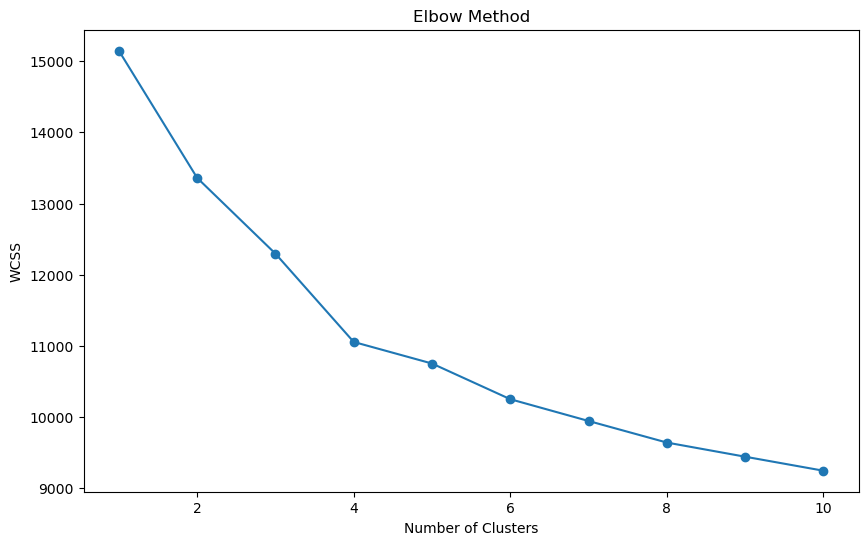

In [459]:
# WCSS 계산 및 시각화
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [460]:
# K-Means 클러스터링 수행 (k=6)
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

In [461]:
# 클러스터 레이블 추가
data['Cluster'] = kmeans.labels_

In [462]:
data

,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,구매한 제품,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,고객 세그먼트,Cluster
0,1987-05-25,38,남,+1-983-243-5951,jeremyberger@newton-watson.com,인천광역시 부평구 부평대로 88,user762756,2023-09-21,픽업트럭,K3,False,2023-10-13,55987533,현금,6,온라인,2020-05,미국,0,0
1,1979-11-24,46,여,001-718-884-2716,robert55@hotmail.com,경기도 고양시 일산동구 중앙로 1036,user787282,2025-01-12,준대형 SUV,Pegas,False,2025-01-30,26135305,계좌이체,1,온라인,2020-12,미국,3,1
2,1984-08-25,41,남,(532)836-9308,garciaelizabeth@burns.net,인천광역시 부평구 부평대로 88,user293846,2024-12-17,준대형 세단,Optima / K5,False,2025-01-05,20425328,현금,3,온라인,2021-01,미국,2,2
3,1971-08-07,54,여,640.695.8051,phillipstroy@yahoo.com,전라북도 군산시 백릉로 300,user935434,2024-01-17,중형 세단,Accent (HC),False,2024-02-14,28976142,신용카드,6,오프라인,2020-06,미국,0,5
4,1991-12-26,34,여,+1-023-521-7921x18289,anthonygraves@smith.com,세종특별자치시 나성북로 21,user384834,2024-12-07,준중형 SUV,EV6,True,2024-12-29,53143909,계좌이체,1,온라인,2019-03,미국,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1972-07-18,53,남,010-7863-2944,user5781@example.com,서울특별시 강남구 테헤란로 123,user452994,2021-09-12,준중형 해치백,Carnival,False,2021-10-09,25020000,현금,2,오프라인,2020-08,대한민국,2,1
1896,1965-07-21,60,여,010-5926-8982,user1371@example.com,대구광역시 수성구 범어동 789,user333338,2015-09-20,준중형 해치백,K4,False,2015-10-12,44660000,신용카드,3,오프라인,2014-04,대한민국,0,5
1897,1986-04-28,39,여,010-3164-6681,user7652@example.com,서울특별시 강남구 테헤란로 123,user292930,2020-06-10,대형 세단,Optima / K5,False,2020-07-04,24570000,신용카드,1,오프라인,2019-12,대한민국,2,2
1898,1977-12-20,48,여,010-1747-7304,user9677@example.com,경기도 성남시 분당구 정자동 202,user973159,2015-09-22,준중형 SUV,KX3,False,2015-10-09,16210000,현금,2,오프라인,2015-03,대한민국,2,1


In [463]:
# 클러스터별 평균 거래 금액, 제품 구매 빈도, 연령 확인
cluster_summary = data.groupby('Cluster')[['거래 금액', '제품 구매 빈도', '연령']].mean()
print(cluster_summary)

                거래 금액  제품 구매 빈도         연령
Cluster                                   
0        4.226188e+07  4.004695  34.098592
1        3.188076e+07  1.440678  53.237288
2        3.198893e+07  1.518201  35.445396
3        5.748596e+07  1.433213  32.848375
4        5.763460e+07  1.529781  51.968652
5        4.191669e+07  4.061611  52.767773


In [464]:
categorical_features = ['성별', '차량구분', '거래 방식', '고객 세그먼트', '친환경차']
for feature in categorical_features:
    print(f"{feature} 분포:")
    print(data.groupby('Cluster')[feature].value_counts())
    print("\n")

성별 분포:
Cluster  성별
0        남     108
         여     105
1        여     209
         남     204
2        여     260
         남     207
3        여     144
         남     133
4        여     171
         남     148
5        남     107
         여     104
Name: count, dtype: int64


차량구분 분포:
Cluster  차량구분   
0        중형 세단      26
         대형 SUV     25
         준대형 세단     23
         준대형 SUV    21
         준중형 해치백    19
                    ..
5        준중형 해치백    17
         중형 세단      17
         준중형 세단     16
         대형 SUV     13
         대형 세단      12
Name: count, Length: 66, dtype: int64


거래 방식 분포:
Cluster  거래 방식
0        신용카드      89
         계좌이체      65
         현금        59
1        계좌이체     199
         현금       114
         신용카드     100
2        현금       166
         신용카드     155
         계좌이체     146
3        신용카드     101
         계좌이체      92
         현금        84
4        계좌이체     110
         신용카드     109
         현금       100
5        신용카드      80
         현금        70
       

In [290]:
data["구매한 제품"].unique()

array(['K3', 'Pegas', 'Optima / K5', 'Accent (HC)', 'EV6', 'KX7',
       "C'eed CUV", 'K4', 'K5', 'Telluride', 'KX5', 'Seltos', 'Sorento',
       'Carnival', 'K2', 'KX3', 'Rio(pride)', 'Forte', 'Carnival (CKD)',
       'Carens MPV', 'Sonet', 'Sportage', "C'eed", 'Syros', 'Cerato',
       'KX1', 'EV5', 'Zhipao', 'EV9', 'Tucson(NX4)'], dtype=object)

In [ ]:
data.count()

생년월일        1900
연령          1900
성별          1900
휴대폰번호       1900
이메일         1900
주소          1900
아이디         1900
가입일         1900
차량구분        1900
구매한 제품      1900
친환경차        1900
제품 구매 날짜    1900
거래 금액       1900
거래 방식       1900
제품 구매 빈도    1900
제품 구매 경로    1900
제품 출시년월     1900
지역          1900
고객 세그먼트     1900
Cluster     1900
dtype: int64

In [292]:
data["제품 구매 경로"].isna().sum()

0

In [ ]:
# 제품 구매 경로가 NaN인 데이터에 온라인, 오프라인 둘 중에 한 랜덤으로 넣지

In [ ]:
data.loc[data["지역"]=="대한민국"]

In [ ]:
on_off = ["온라인", "오프라인"]
data.loc[data["제품 구매 경로"].isna(), "제품 구매 경로"] = np.random.choice(on_off, size=len(data.loc[data["제품 구매 경로"].isna(), "제품 구매 경로"]))

In [195]:
data

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,...,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,고객 세그먼트,Cluster
0,Emily Johnson,1987-05-25,38,남,+1-983-243-5951,jeremyberger@newton-watson.com,인천광역시 부평구 부평대로 88,user762756,2023-09-21,픽업트럭,...,False,2023-10-13,55987533,현금,6,온라인,2020-05,미국,1,0
1,Jessica Smith,1979-11-24,46,여,001-718-884-2716,robert55@hotmail.com,경기도 고양시 일산동구 중앙로 1036,user787282,2025-01-12,준대형 SUV,...,False,2025-01-30,26135305,계좌이체,1,온라인,2020-12,미국,3,4
2,Robert White,1984-08-25,41,남,(532)836-9308,garciaelizabeth@burns.net,인천광역시 부평구 부평대로 88,user293846,2024-12-17,준대형 세단,...,False,2025-01-05,20425328,현금,3,온라인,2021-01,미국,2,0
3,John Smith,1971-08-07,54,여,640.695.8051,phillipstroy@yahoo.com,전라북도 군산시 백릉로 300,user935434,2024-01-17,중형 세단,...,False,2024-02-14,28976142,신용카드,6,오프라인,2020-06,미국,2,0
4,Emily Thomas,1991-12-26,34,여,+1-023-521-7921x18289,anthonygraves@smith.com,세종특별자치시 나성북로 21,user384834,2024-12-07,준중형 SUV,...,True,2024-12-29,53143909,계좌이체,1,온라인,2019-03,미국,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,김하준,1972-07-18,53,남,010-7863-2944,user5781@example.com,서울특별시 강남구 테헤란로 123,user452994,2021-09-12,준중형 해치백,...,False,2021-10-09,25020000,할부,2,온라인,2020-08,대한민국,3,4
1896,최지민,1965-07-21,60,여,010-5926-8982,user1371@example.com,대구광역시 수성구 범어동 789,user333338,2015-09-20,준중형 해치백,...,False,2015-10-12,44660000,할부,3,온라인,2014-04,대한민국,1,0
1897,장지민,1986-04-28,39,여,010-3164-6681,user7652@example.com,서울특별시 강남구 테헤란로 123,user292930,2020-06-10,대형 세단,...,False,2020-07-04,24570000,현금,1,오프라인,2019-12,대한민국,3,3
1898,임예린,1977-12-20,48,여,010-1747-7304,user9677@example.com,경기도 성남시 분당구 정자동 202,user973159,2015-09-22,준중형 SUV,...,False,2015-10-09,16210000,할부,2,오프라인,2015-03,대한민국,3,4


In [205]:
data.loc[(data["고객 세그먼트"]==2) & (data["제품 구매 경로"]=="온라인"), ]

,이름,생년월일,연령,성별,휴대폰번호,이메일,주소,아이디,가입일,차량구분,...,친환경차,제품 구매 날짜,거래 금액,거래 방식,제품 구매 빈도,제품 구매 경로,제품 출시년월,지역,고객 세그먼트,Cluster
2,Robert White,1984-08-25,41,남,(532)836-9308,garciaelizabeth@burns.net,인천광역시 부평구 부평대로 88,user293846,2024-12-17,준대형 세단,...,False,2025-01-05,20425328,현금,3,온라인,2021-01,미국,2,0
20,Emily Anderson,1981-01-05,44,여,+1-952-254-9457x03176,cardenaslori@lewis.info,충청북도 청주시 상당구 상당로 82,user279214,2025-01-18,픽업트럭,...,False,2025-01-27,29746428,계좌이체,3,온라인,2020-07,미국,2,0
21,David Brown,1964-08-03,61,남,654-876-5781,fishersarah@yahoo.com,광주광역시 서구 상무중앙로 75,user847241,2023-07-02,준중형 해치백,...,False,2023-07-07,32321579,계좌이체,3,온라인,2021-03,미국,2,4
26,Laura Thomas,1988-01-12,37,여,001-953-762-1098x53272,laurawilliams@yahoo.com,울산광역시 남구 삼산로 198,user750755,2025-03-15,준중형 SUV,...,False,2025-03-25,20437015,계좌이체,3,온라인,2022-04,미국,2,0
50,Emily Davis,1965-04-10,60,남,9706440712,laurendonaldson@gmail.com,인천광역시 부평구 부평대로 88,user959987,2024-05-05,준대형 세단,...,False,2024-05-27,31946438,현금,3,온라인,2018-01,미국,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,Valeria Martinez,1994-10-05,31,남,+67(4)7169568601,vtrevino@gmail.com,충청남도 천안시 서북구 불당로 48,user190022,2024-05-04,소형 해치백,...,False,2024-05-31,32580217,신용카드,4,온라인,2018-08,멕시코,2,0
1615,이민준,1960-07-05,65,남,010-7210-7515,user8673@example.com,대구광역시 수성구 범어동 789,user507128,2025-07-13,중형 세단,...,True,2025-08-06,17820000,현금,1,온라인,2023-10,대한민국,2,4
1699,이지우,1992-03-21,33,여,010-6263-3007,user9080@example.com,대구광역시 수성구 범어동 789,user446020,2024-11-08,대형 SUV,...,True,2024-12-07,42390000,현금,1,온라인,2023-10,대한민국,2,3
1838,강하은,1993-07-12,32,여,010-4622-6063,user5590@example.com,경기도 성남시 분당구 정자동 202,user442009,2024-10-02,준대형 세단,...,True,2024-10-18,47690000,할부,2,온라인,2023-10,대한민국,2,1


In [214]:
data["거래 방식"].unique()

array(['현금', '계좌이체', '신용카드', '할부', '리스'], dtype=object)

In [339]:
data.to_csv("../data/기아_고객_데이터_완성.csv", index=False, encoding="utf-8")

In [357]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold

In [443]:
data = pd.read_csv('../data/기아_고객_데이터_완성.csv', encoding='utf-8')

In [444]:
# 범주형과 수치형 변수 구분
categorical_cols = ['성별', '차량구분', '거래 방식', '제품 출시년월', '제품 구매 날짜', '고객 세그먼트', '친환경차']
numerical_cols = ['연령', '거래 금액', '제품 구매 빈도']

In [445]:
# 타겟 변수 설정
X = data[categorical_cols + numerical_cols]
y = data['Cluster']

In [446]:
# 파이프라인 생성
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [447]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)


In [448]:
# 모델 1: Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [449]:
# 모델 2: Gradient Boosting
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

In [450]:
# 모델 3: SVM
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [451]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [452]:
# 모델 학습 및 평가
# Random Forest
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n")

Random Forest:
Accuracy: 1.000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        83
           4       1.00      1.00      1.00        63
           5       1.00      1.00      1.00        51

    accuracy                           1.00       380
   macro avg       1.00      1.00      1.00       380
weighted avg       1.00      1.00      1.00       380





In [440]:
# Gradient Boosting
gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)
print("Gradient Boosting:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.3f}")
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("\n")

Gradient Boosting:
Accuracy: 1.000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        32

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190





In [441]:
# SVM
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)
print("SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM:
Accuracy: 1.000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        32

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



ValueError: could not convert string to float: '1987-05-25'

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv("../data/기아_고객_데이터_완성.csv", encoding="utf-8")

In [ ]:
# 타겟 변수 설정
target = '고객 세그먼트'
car_features = ['거래 방식', '제품 출시년월', '제품 구매 날짜']
num_features = ['거래 금액', '제품 구매 빈도']
# 데이터 전처리 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), car_features)
    ]
)
# 모델 파이프라인 생성
pipelines = {
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(random_state=42))
    ])
}
# 데이터 분할
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### RandomForestClassifier 학습 및 평가 ###
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("\n")
### GradientBoostingClassifier 학습 및 평가 ###
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])
gb_pipeline.fit(X_train, y_train)
gb_pred = gb_pipeline.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))
print("\n")

### SVC 학습 및 평가 ###
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
print("\n")
import joblib
joblib.dump(gb_pipeline, 'model/gb_model.pkl')

In [4]:
# 타겟 변수 설정
target = '고객 세그먼트'
car_features = ['거래 방식', '제품 출시년월', '제품 구매 날짜']
num_features = ['거래 금액', '제품 구매 빈도']
# 데이터 전처리 파이프라인 생성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), car_features)
    ]
)

In [5]:
# 모델 파이프라인 생성
pipelines = {
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(random_state=42))
    ])
}

In [6]:
# 데이터 분할
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
### RandomForestClassifier 학습 및 평가 ###
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9842105263157894
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        83
           1       0.97      0.99      0.98       114
           2       0.98      1.00      0.99       111
           3       1.00      1.00      1.00        72

    accuracy                           0.98       380
   macro avg       0.99      0.98      0.98       380
weighted avg       0.98      0.98      0.98       380



In [9]:
### GradientBoostingClassifier 학습 및 평가 ###
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])
gb_pipeline.fit(X_train, y_train)
gb_pred = gb_pipeline.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))
print("\n")

Gradient Boosting Accuracy: 0.9973684210526316
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      0.99      1.00       114
           2       0.99      1.00      1.00       111
           3       1.00      1.00      1.00        72

    accuracy                           1.00       380
   macro avg       1.00      1.00      1.00       380
weighted avg       1.00      1.00      1.00       380





In [10]:
### SVC 학습 및 평가 ###
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
svm_pipeline.fit(X_train, y_train)
svm_pred = svm_pipeline.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
print("\n")

SVM Accuracy: 0.9921052631578947
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       1.00      0.99      1.00       114
           2       0.98      1.00      0.99       111
           3       1.00      1.00      1.00        72

    accuracy                           0.99       380
   macro avg       0.99      0.99      0.99       380
weighted avg       0.99      0.99      0.99       380





In [12]:
import joblib
joblib.dump(gb_pipeline, 'model/gb_model_ks.pkl')

['model/gb_model_ks.pkl']

In [39]:
df = pd.read_csv("../data/기아_고객_데이터_완성.csv", encoding="utf-8")

In [53]:
df["구매한 제품"].unique()

array(['K3', 'Pegas', 'Optima / K5', 'Rio(pride)', 'EV6', 'KX7',
       "C'eed CUV", 'K4', 'Telluride', 'KX5', 'Seltos', 'Sorento',
       'Carnival', 'K2', 'KX3', 'Forte', 'Carens MPV', 'Sonet',
       'Sportage', "C'eed", 'Syros', 'Cerato', 'KX1', 'EV5', 'Zhipao',
       'EV9', 'K5'], dtype=object)

In [ ]:
retrade_cars = ['K4', ]

In [36]:
df.loc[(df["구매한 제품"]== "Accent (HC)"), "구매한 제품"] = "Rio(pride)"

In [51]:
df.to_csv("../data/기아_고객_데이터_완성.csv", encoding="utf-8", index=False)

In [50]:
df.loc[df["구매한 제품"]== "Carnival (CKD)", "구매한 제품"]

Series([], Name: 구매한 제품, dtype: object)